In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('zomato.csv',encoding="ISO-8859-1")

country = pd.read_excel('Country-Code.xlsx')
country.head()
df.shape
#df.head()

(9551, 21)

In [10]:
data = df.merge(country,on='Country Code')
data.head()
#data.shape

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [5]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
# data.isnull.sum() # not working

In [7]:
data['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
Bhubaneshwar          21
Amritsar              21
Ahmedabad             21
Lucknow               21
Guwahati              21
Dubai                 20
Varanasi              20
Pretoria              20
Bangalore             20
London                20
Nagpur                20
Mysore                20
Augusta               20
Boise                 20
Ludhiana              20
Surat                 20
Savannah              20
Rio de Janeiro        20
Des Moines            20
Albany                20
Vadodara              20
Mangalore             20
Dehradun              20
Birmingham            20
Orlando               20
                    ... 
Lincoln                1
Penola                 1
Consort                1
Dicky Beach            1
Mc Millan              1
Ojo Caliente           1
Mohali                 1
Macedon                1
Paynesville            1


In [8]:
data[['Currency','Restaurant Name', 'Average Cost for two']].sort_values('Average Cost for two', ascending=False)

,Currency,Restaurant Name,Average Cost for two
9284,Indonesian Rupiah(IDR),Satoo - Hotel Shangri-La,800000
9283,Indonesian Rupiah(IDR),Skye,800000
9287,Indonesian Rupiah(IDR),Sushi Masa,500000
9289,Indonesian Rupiah(IDR),3 Wise Monkeys,450000
9294,Indonesian Rupiah(IDR),Avec Moi Restaurant and Bar,350000
9295,Indonesian Rupiah(IDR),Onokabe,300000
9288,Indonesian Rupiah(IDR),Lucky Cat Coffee & Kitchen,300000
9278,Indonesian Rupiah(IDR),Lemongrass,250000
9285,Indonesian Rupiah(IDR),MONKS,250000
9296,Indonesian Rupiah(IDR),Talaga Sampireun,200000


In [9]:
data['Country'].value_counts()


India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Singapore           20
Qatar               20
Canada               4
Name: Country, dtype: int64

In [10]:
data['Country'].value_counts(normalize=True)

India             0.905874
United States     0.045440
United Kingdom    0.008376
Brazil            0.006282
South Africa      0.006282
UAE               0.006282
New Zealand       0.004188
Turkey            0.003560
Australia         0.002513
Phillipines       0.002303
Indonesia         0.002199
Sri Lanka         0.002094
Singapore         0.002094
Qatar             0.002094
Canada            0.000419
Name: Country, dtype: float64

In [11]:
data.drop_duplicates(subset=['Restaurant Name','Country','City','Locality'],inplace=True)
data.shape

(9458, 22)

In [9]:
countries = data['Country'].value_counts().index
countries

Index([u'India', u'United States', u'United Kingdom', u'Brazil',
       u'South Africa', u'UAE', u'New Zealand', u'Turkey', u'Australia',
       u'Phillipines', u'Indonesia', u'Sri Lanka', u'Singapore', u'Qatar',
       u'Canada'],
      dtype='object')

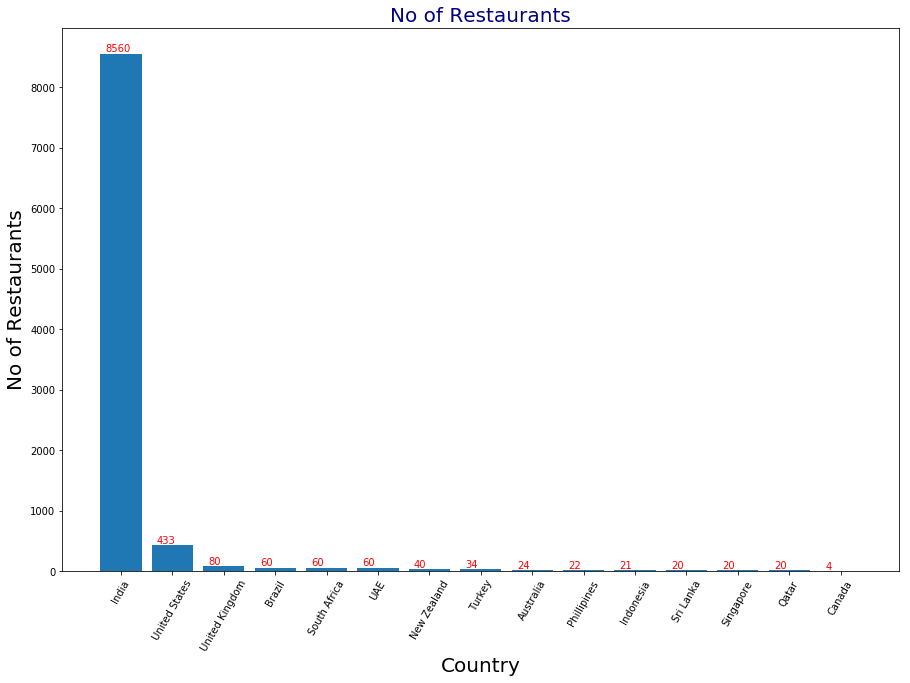

In [12]:
countries = data['Country'].value_counts().index
no_of_restaurants = data['Country'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(countries,no_of_restaurants)
plt.xlabel('Country',fontsize=20)
plt.ylabel('No of Restaurants',fontsize=20)
plt.title('No of Restaurants',fontsize=20,color='navy')
for idx,num in enumerate(no_of_restaurants):
    plt.text(idx-0.3,num+30,s=str(num),color='red')
plt.xticks(rotation=60)
plt.show()


In [13]:
data.pivot_table(index=['Country', 'City'], values = 'Restaurant ID',aggfunc='count').sort_values('Restaurant ID',ascending=False)
data.pivot_table(index=['Country', 'City'], values = 'Votes',aggfunc='count').sort_values('Votes',ascending=False)
#data[data['Country'] != 'India'].pivot_table(index=['Country', 'City'],values = 'Restaurant ID',aggfunc='count').sort_values('Restaurant ID',ascending=False)

Votes
Country        City                   
India          New Delhi          5473
               Gurgaon            1118
               Noida              1080
               Faridabad           251
               Ghaziabad            25
               Bhubaneshwar         21
               Guwahati             21
               Lucknow              21
               Ahmedabad            21
               Amritsar             21
               Nagpur               20
               Patna                20
United States  Dalton               20
India          Nashik               20
               Vadodara             20
               Mysore               20
               Mumbai               20
               Pune                 20
United States  Davenport            20
India          Mangalore            20
United States  Augusta              20
India          Kolkata              20
               Kochi                20
               Puducherry           20
               Ranchi               20
               Jaipur               20
               Surat                20
United States  Albany               20
United Kingdom Manchester           20
               London               20
...                                ...
Australia      Beechworth            1
               Dicky Beach           1
               East Ballina          1
               Flaxton               1
               Forrest               1
               Huskisson             1
               Inverloch             1
               Lakes Entrance        1
               Lorn                  1
               Macedon               1
               Mayfield              1
               Middleton Beach       1
               Montville             1
               Palm Cove             1
               Paynesville           1
               Penola                1
               Phillip Island        1
               Tanunda               1
               Trentham East         1
               Victor Harbor         1
Canada         Chatham-Kent          1
               Consort               1
               Vineland Station      1
               Yorkton               1
India          Mohali                1
               Panchkula             1
Australia      Balingup              1
Indonesia      Bandung               1
Phillipines    Quezon City           1
United States  Winchester Bay        1

[141 rows x 1 columns]

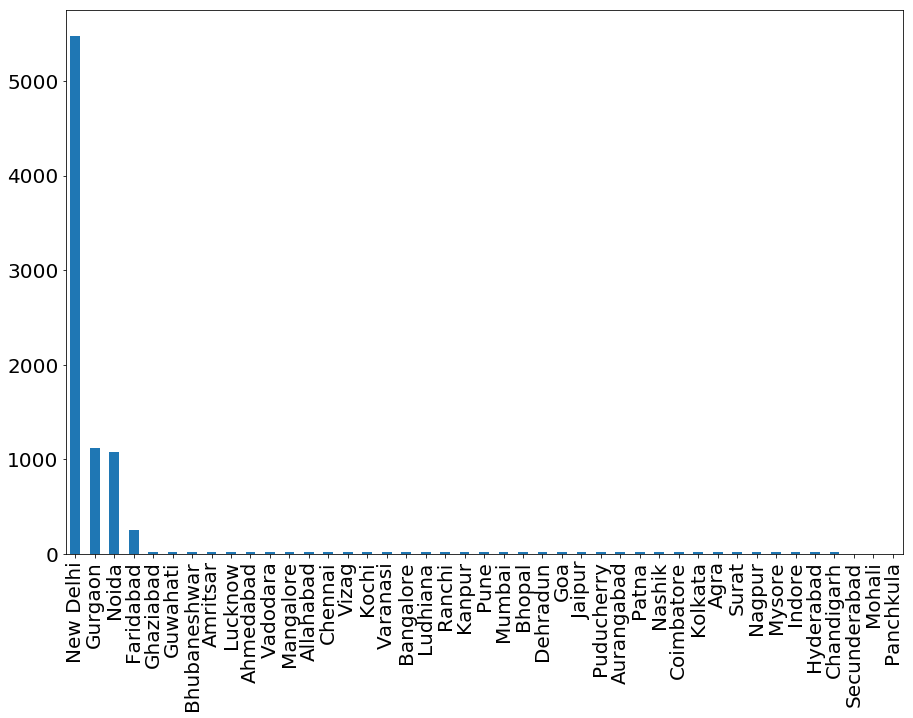

In [19]:
data_city=data[data['Country']=='India']
#data_city.head()
Total_city=data_city['City'].value_counts()
#Total_city
Total_city.plot.bar(figsize=(15,10),fontsize=20)


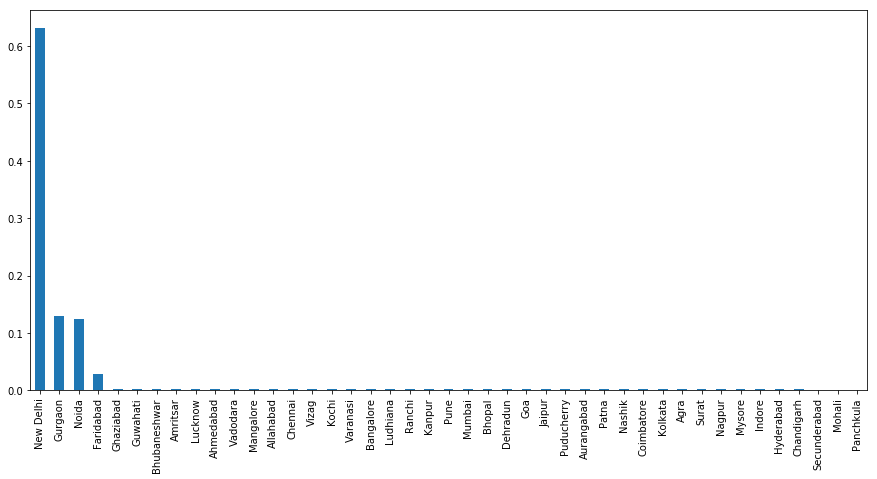

In [15]:
data[data['Country']=='India']['City'].value_counts(normalize=True).plot(kind='bar',figsize=(15,7))

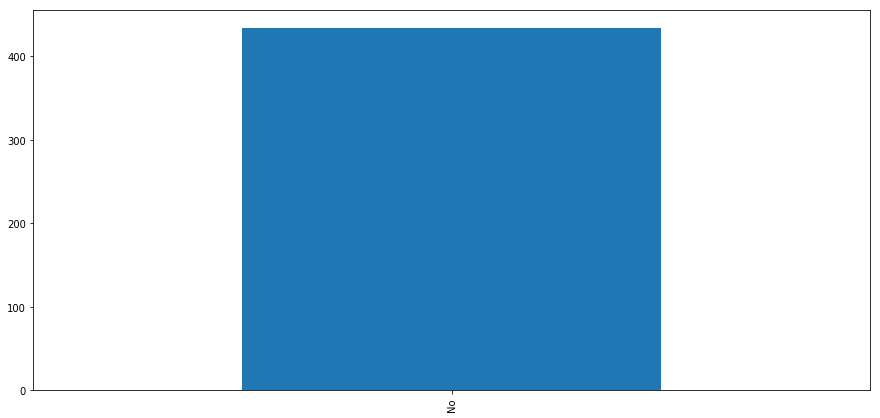

In [22]:
data_online_delivary=data[data['Country']=='United States']
data_online_delivary.head()
data_online_delivary['Has Online delivery'].value_counts().plot(kind='bar',figsize=(15,7))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

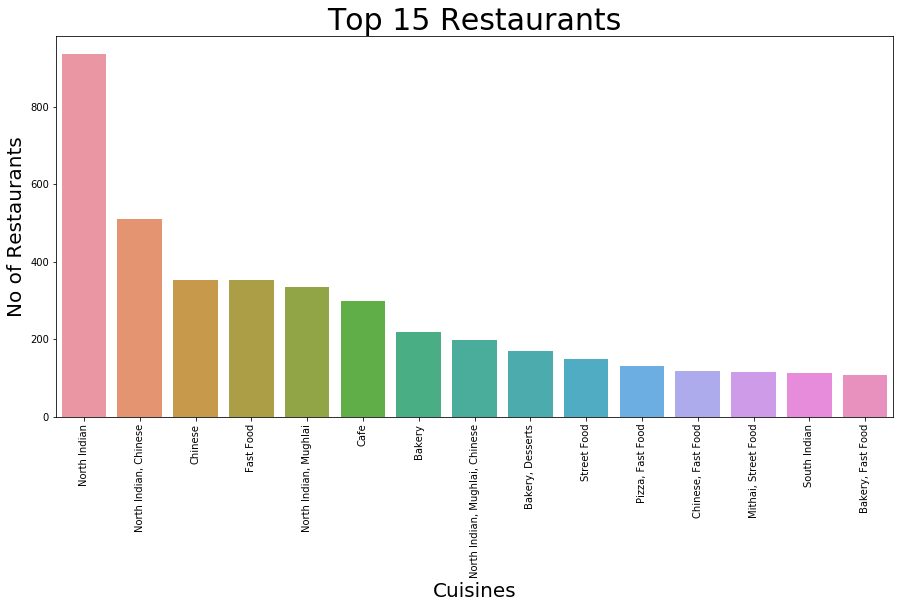

In [38]:
fig=plt.figure(figsize=(15,7))
sns.barplot(data['Cuisines'].value_counts().index[:15],data['Cuisines'].value_counts()[:15])
plt.xlabel('Cuisines',fontsize=20)
plt.ylabel('No of Restaurants',fontsize=20)
plt.title('Top 15 Restaurants',fontsize=30)
plt.xticks(rotation=90)

In [39]:
cuisines = ['Noth Indian', 'Fast Food', 'Chinese']
data_small = data[data['Cuisines'].isin(cuisines)]
data_small.head()
#sns.catplot(x='Cuisines', col='Country', col_wrap=3, kind='count', data=data_small.dropna(),sharey=False)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
88,17284094,Chick-fil-A,216,Albany,"2703 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219300,31.616000,Fast Food,...,No,No,No,No,1,3.5,Yellow,Good,67,United States
93,17284150,House of China Restaurant II,216,Albany,"2526 Dawson Rd Ste A, Albany, GA 31707",Albany,"Albany, Albany",-84.212000,31.610400,Chinese,...,No,No,No,No,1,3.8,Yellow,Good,153,United States
169,17316208,Ting's Red Lantern,216,Cedar Rapids/Iowa City,"540 Boyson Rd NE, Cedar Rapids, IA 52402",Cedar Rapids,"Cedar Rapids, Cedar Rapids/Iowa City",-91.639400,42.046800,Chinese,...,No,No,No,No,1,4.2,Green,Very Good,347,United States
195,17330087,Chef Lee's Peking Restaurant,216,Columbus,"6100 Bradley Park Dr, Columbus, GA 31904",Columbus,"Columbus, Columbus",-84.960700,32.539300,Chinese,...,No,No,No,No,2,4.0,Green,Very Good,335,United States


# Pandas Profiling

In [41]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data,title='Pandas Profiling Report')
#profile
# unable to install pandas_profiling in office Pc

ImportError: No module named pandas_profiling

# Average ratings of countries

In [42]:
data.groupby('Country')['Aggregate rating'].mean()

Country
Australia         3.658333
Brazil            3.763333
Canada            3.575000
India             2.523324
Indonesia         4.295238
New Zealand       4.262500
Phillipines       4.468182
Qatar             4.060000
Singapore         3.575000
South Africa      4.210000
Sri Lanka         3.870000
Turkey            4.300000
UAE               4.233333
United Kingdom    4.087500
United States     4.004378
Name: Aggregate rating, dtype: float64

In [44]:
data_india = data[data['Country']=='India']
data_india.groupby('City')['Aggregate rating'].mean()

City
Agra            3.965000
Ahmedabad       4.161905
Allahabad       3.395000
Amritsar        3.685714
Aurangabad      3.375000
Bangalore       4.375000
Bhopal          3.950000
Bhubaneshwar    3.980952
Chandigarh      4.050000
Chennai         4.315000
Coimbatore      4.135000
Dehradun        4.050000
Faridabad       1.866932
Ghaziabad       2.852000
Goa             4.245000
Gurgaon         2.651431
Guwahati        4.190476
Hyderabad       4.344444
Indore          3.970000
Jaipur          4.130000
Kanpur          3.815000
Kochi           4.080000
Kolkata         4.255000
Lucknow         4.195238
Ludhiana        3.980000
Mangalore       3.745000
Mohali          4.300000
Mumbai          4.085000
Mysore          3.695000
Nagpur          3.965000
Nashik          3.520000
New Delhi       2.438845
Noida           2.036204
Panchkula       4.200000
Patna           3.455000
Puducherry      3.730000
Pune            4.220000
Ranchi          3.455000
Secunderabad    4.500000
Surat           3.93

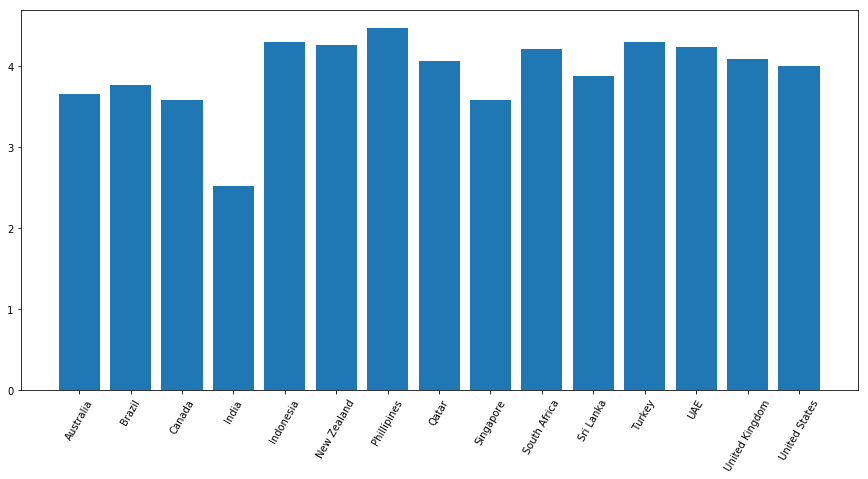

In [54]:
country_average=data.groupby('Country')['Aggregate rating'].mean().reset_index()
fig=plt.figure(figsize=(15,7))
plt.bar(country_average['Country'],country_average['Aggregate rating'] )
plt.xticks(rotation=60)
plt.show()